# Load all the imports! 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, adjusted_rand_score,homogeneity_score, completeness_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import seaborn as sns; 
import string

# Visualize data

In [0]:
dataset = pd.read_csv('Rogoz O. Ana-Cristina.csv')

In [0]:
dataset = dataset.drop(columns=["Unnamed: 0"])

Setul de date este alcatuit din 20 de coloane, fiecare reprezentand numele unui autor, cu cate 20 de linii. 
Coloana reprezentata de fiecare autor in parte contine cate 20 de texte scrise de acesta, in varianta lor originala. 

Asadar, autorii prezenti sunt: 'Harold Bindloss', 'Washington Irving', 'Thomas Hardy', 'Frank Richard Stockton', 'John Bunyan', 'Wilkie Collins', 'Charles Darwin', 'Herbert George Wells', 'Edward Stratemeyer', 'Zane Grey', 'Rudyard Kipling', 'Daniel Defoe', 'Andrew Lang', 'Sir Walter Scott', 'Lord Byron', 'Jack London', 'John Galsworthy', 'R M Ballantyne', 'Bret Harte' si 'Charles Dickens'.

In [32]:
dataset

,Harold Bindloss,Washington Irving,Thomas Hardy,Frank Richard Stockton,John Bunyan,Wilkie Collins,Charles Darwin,Herbert George Wells,Edward Stratemeyer,Zane Grey,Rudyard Kipling,Daniel Defoe,Andrew Lang,Sir Walter Scott,Lord Byron,Jack London,John Galsworthy,R M Ballantyne,Bret Harte,Charles Dickens
0,"carefully, went a yard or two along the trunk....","politician, electioneered, written for the new...",the last you will ever sing to me.' 'They may...,"but that simple-minded dependant and relative,...","yet come, though he is coming, is not fit, not...",bowed. That incorrigible old woman treated him...,twelve marked perfect flowers yielded a capsul...,his sleeve.... Had she even loved Booth Wilmi...,about that four-hundred-dollar diamond ring th...,"voice. ""Yes. What's wanted?"" answered Lane. ...","As Thou didst teach all lovers speech, A...",that the kings of France and Spain were united...,truth there may be in Saint-Germain's travels ...,"o' them,--and I'll hae somebody waiting to wei...","Gael and Saxon mingling banners shine, And...",THE HOUSE OF PRIDE Contents: The House of ...,his face--what a substitute for her soft cheek...,"Lucien was grave, gentle, and studious; elegan...",you can find out where they got in and remove ...,"fingers as I ever watched. ""Well, Charley,"" s..."
1,make for Tomlinson. He had been a strong and h...,"face to comfort me. Well, as I was saying, my ...","flush perceptibly. 'Ah, she is there,' he tho...",it had not been for this unfortunate and jealo...,promise of none effect; therefore they of the ...,"_them;_ there shall be no rest for _you!_"" Th...",their brethren of the northern or southern hem...,in the following fashion:--To contrive a revol...,discomfiture a miner came along who said he ha...,presently stopped his plunging which gave me a...,"You've too much conceited Brain, too little St...","them and to me. First, he turned to me, and po...",did he see the princess than he fell in love w...,"playhouse ditty,-- ""Lawn as white as dr...",STANZAS.[591] 1. ...,"three days I lived off guavas, ohia-apples, an...","a pale bright streak along the water, and hid ...",impressed with the mysterious and important ob...,indication I had received of Miss Mannersley's...,mournful past; as if the house and he had had ...
2,"usually happens, however, that when one sets a...",popular among the choice spirits of the last c...,THE WOODLANDERS by Thomas Hardy CHAPTE...,"by. He filled it, then he sat down and wiped h...","other intelligence, if possibly he may arrive ...","health, and the doctor's plain warning of peri...","[page 74] pinkish colour, and many present a ...",his day; (4) a bibliography. Such a complete b...,keep from being discovered. As they sped alon...,"and bye our wash grew to be a wide canyon, win...",they used him too much at the start; Mayb...,"the Divine Powers, for saving, my life, when t...","And all the folk fair Helen must convey, Crown...","love or money."" ""Tony Foster lives and thrive...",marble where her feet ...,"breath in a half-sob, then tightened her lips ...","country village. I, however, was so angry that...","Thus spake the Greyton oracle; but, prophet th...",intrigue than physical revenge. He was not awa...,"could he, could he, could he--and lost utteran..."
3,"by the oxen's slower pace, and his own labored...",cacique was inflexible. He reminded them of th...,"said Marian, ""that I hardly cool down again ti...",and snooded to the lines with a neatness that ...,"unbelief, whose foundation was ignorance and f...","back by the wind--in a snug roadstead, for the...","THE DESCENT OF MAN, AND SELECTION IN RELAT...",old grey butler was really wonderfully good......,murmured Allen to himself as he surveyed the s...,"sit down to breakfast, and here and there caug...","she isn't under White's dormitory at all yet.""...","_Vespers_, with Delight enough to my self, and...",the woman who has come within the gates of the...,would admit that the chief end of their being ...,"gr

In [33]:
dataset.shape


(20, 20)

In [34]:
dataset.columns.values

array(['Harold Bindloss', 'Washington Irving', 'Thomas Hardy',
       'Frank Richard Stockton', 'John Bunyan', 'Wilkie Collins',
       'Charles Darwin', 'Herbert George Wells', 'Edward Stratemeyer',
       'Zane Grey', 'Rudyard Kipling', 'Daniel Defoe', 'Andrew Lang',
       'Sir Walter Scott', 'Lord Byron', 'Jack London', 'John Galsworthy',
       'R M Ballantyne', 'Bret Harte', 'Charles Dickens'], dtype=object)

# Preprocesari 

* Pentru o mai buna evaluare a stilului fiecarui autor in parte in functie de cuvintele utilizate, vom elimina toate semnele de punctuatie din textele date. 


* Ulterior, vom folosi procedeul de stemming pentru a reduce cuvintele la cuvantul de baza din care provin, astfel incat sa nu se perceapa diferente intre diverse variatiuni de timp verbal, articole etc. intre cuvinte. 

In [0]:
for author in dataset.columns.values:
  for i in range(0, len(dataset)):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    dataset[author][i] = str(dataset[author][i]).translate(translator) 

In [36]:
dataset

,Harold Bindloss,Washington Irving,Thomas Hardy,Frank Richard Stockton,John Bunyan,Wilkie Collins,Charles Darwin,Herbert George Wells,Edward Stratemeyer,Zane Grey,Rudyard Kipling,Daniel Defoe,Andrew Lang,Sir Walter Scott,Lord Byron,Jack London,John Galsworthy,R M Ballantyne,Bret Harte,Charles Dickens
0,carefully went a yard or two along the trunk ...,politician electioneered written for the new...,the last you will ever sing to me They may...,but that simple minded dependant and relative ...,yet come though he is coming is not fit not...,bowed That incorrigible old woman treated him...,twelve marked perfect flowers yielded a capsul...,his sleeve Had she even loved Booth Wilmi...,about that four hundred dollar diamond ring th...,voice Yes What s wanted answered Lane ...,As Thou didst teach all lovers speech A...,that the kings of France and Spain were united...,truth there may be in Saint Germain s travels ...,o them and I ll hae somebody waiting to wei...,Gael and Saxon mingling banners shine And...,THE HOUSE OF PRIDE Contents The House of ...,his face what a substitute for her soft cheek...,Lucien was grave gentle and studious elegan...,you can find out where they got in and remove ...,fingers as I ever watched Well Charley s...
1,make for Tomlinson He had been a strong and h...,face to comfort me Well as I was saying my ...,flush perceptibly Ah she is there he tho...,it had not been for this unfortunate and jealo...,promise of none effect therefore they of the ...,them there shall be no rest for you Th...,their brethren of the northern or southern hem...,in the following fashion To contrive a revol...,discomfiture a miner came along who said he ha...,presently stopped his plunging which gave me a...,You ve too much conceited Brain too little St...,them and to me First he turned to me and po...,did he see the princess than he fell in love w...,playhouse ditty Lawn as white as dr...,STANZAS 591 1 ...,three days I lived off guavas ohia apples an...,a pale bright streak along the water and hid ...,impressed with the mysterious and important ob...,indication I had received of Miss Mannersley s...,mournful past as if the house and he had had ...
2,usually happens however that when one sets a...,popular among the choice spirits of the last c...,THE WOODLANDERS by Thomas Hardy CHAPTE...,by He filled it then he sat down and wiped h...,other intelligence if possibly he may arrive ...,health and the doctor s plain warning of peri...,page 74 pinkish colour and many present a ...,his day 4 a bibliography Such a complete b...,keep from being discovered As they sped alon...,and bye our wash grew to be a wide canyon win...,they used him too much at the start Mayb...,the Divine Powers for saving my life when t...,And all the folk fair Helen must convey Crown...,love or money Tony Foster lives and thrive...,marble where her feet ...,breath in a half sob then tightened her lips ...,country village I however was so angry that...,Thus spake the Greyton oracle but prophet th...,intrigue than physical revenge He was not awa...,could he could he could he and lost utteran...
3,by the oxen s slower pace and his own labored...,cacique was inflexible He reminded them of th...,said Marian that I hardly cool down again ti...,and snooded to the lines with a neatness that ...,unbelief whose foundation was ignorance and f...,back by the wind in a snug roadstead for the...,THE DESCENT OF MAN AND SELECTION IN RELAT...,old grey butler was really wonderfully good ...,murmured Allen to himself as he surveyed the s...,sit down to breakfast and here and there caug...,she isn t under White s dormitory at all yet ...,Vespers with Delight enough to my self and...,the woman who has come within the gates of the...,would admit that the chief end of their being ...,grandeur But it may fairly match with Byron ...,be out of it No we re in for it said F...,shocked and quite unable to write anything H...,incomparably more grand and horrible than the ...,the few silver coins 

In [8]:
!pip install stemming

  Running setup.py bdist_wheel for stemming ... - done
  Stored in directory: /root/.cache/pip/wheels/e8/05/2e/2ddeb64d4464b854b48323f9676528c17560da7d153db7b0e2
Successfully built stemming


In [0]:
from stemming.porter2 import stem

dataset = [[stem(word.lower()) for word in fragment.split(" ")] for author in dataset.columns.values for fragment in dataset[author]]

In [0]:
dataset = [' '.join(fragment) for fragment in dataset]
dataset = [fragment.replace('\n',' ') for fragment in dataset]

In [39]:
len(dataset)

400

## Make author labels for training. 

In aceasta sectiune am codificat numele fiecarui autor in indici de la 0 la 19 pe care ii vom folosi pentru antrenare.

In [0]:
authors = ['Harold Bindloss', 'Washington Irving', 'Thomas Hardy',
       'Frank Richard Stockton', 'John Bunyan', 'Wilkie Collins',
       'Charles Darwin', 'Herbert George Wells', 'Edward Stratemeyer',
       'Zane Grey', 'Rudyard Kipling', 'Daniel Defoe', 'Andrew Lang',
       'Sir Walter Scott', 'Lord Byron', 'Jack London', 'John Galsworthy',
       'R M Ballantyne', 'Bret Harte', 'Charles Dickens']
authors_dict = {}
for index in range(len(authors)):
  authors_dict[index] = authors[index];

In [41]:
authors_dict

{0: 'Harold Bindloss',
 1: 'Washington Irving',
 2: 'Thomas Hardy',
 3: 'Frank Richard Stockton',
 4: 'John Bunyan',
 5: 'Wilkie Collins',
 6: 'Charles Darwin',
 7: 'Herbert George Wells',
 8: 'Edward Stratemeyer',
 9: 'Zane Grey',
 10: 'Rudyard Kipling',
 11: 'Daniel Defoe',
 12: 'Andrew Lang',
 13: 'Sir Walter Scott',
 14: 'Lord Byron',
 15: 'Jack London',
 16: 'John Galsworthy',
 17: 'R M Ballantyne',
 18: 'Bret Harte',
 19: 'Charles Dickens'}

In [42]:
authors_encodings = list(range(20))
authors_encodings = sorted(authors_encodings*20)

print (authors_encodings)
print (len(authors_encodings))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

## Make feature vectors for training.

* Am codificat fragmentele de text preprocesate folosind doua metode: CountVectorizer si TfidfVectorizer(ce se bazeaza atat CountVectorizer, dar si pe TfidfTransformer ce atribuie fiecarui cuvant o importanta invers proportionala cu frecventa pe care o are in textul dat.)

* Am transformat in vectori matricele reiesite din CountVectorizer si TfidfVectorizer pentru a le putea folosi pentru antrenare.

In [0]:
text_fragments = dataset

### CountVectorizer 

In [0]:
vectorizer = CountVectorizer()
text_fragments_count = vectorizer.fit_transform(text_fragments)


In [45]:
X_count = text_fragments_count.toarray()
y_count = authors_encodings

print (X_count.shape)

(400, 110457)


### TfIdfVectorizer 

In [0]:
vectorizer = TfidfVectorizer()
text_fragments_Tfid = vectorizer.fit_transform(text_fragments)


In [47]:
X_tfidf = text_fragments_Tfid.toarray()
y_tfidf = authors_encodings

print (X_tfidf.shape)

(400, 110457)


# Task  1:  Text  Classification

Pentru acest prim task vom antrena folosind SVC si vom cauta cei mai buni parametri din punctul de vedere al acuratetii modelului folosind GridSearch. Parametri pe care ii vom varia sunt: 
* kernel: linear, rbf
* C: 1, 10 
* gamma: 1, 10 

Atat pentru setul de date pe care il avem cu Count Vectorizer, dar si pentru cel pe care l-am obtinut cu TfidfVectorizer, vom imparti datele in set de antrenare si set de testare, vom rula GridSearch pentru cel de antrenare, iar la finala vom compara scorurile de acuratete. 

Apoi, pentru a vizualiza mai bine rezultatele, vom adauga doua matrice de confuzie pentru a vedea ce autori sunt cel mai frecvent gresit clasificati. 


## CountVectorizer

In [0]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'gamma':[1,10]}

In [0]:
svc = SVC()

X_train, X_test, y_train, y_test = train_test_split(X_count, y_count, test_size = 0.3)

classifier = GridSearchCV(svc, parameters, return_train_score=True, verbose=True)
classifier.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  8.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10], 'gamma': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [0]:
print (classifier.cv_results_)
print (classifier.best_score_)
print (classifier.best_params_)

{'mean_fit_time': array([ 8.4527746 , 14.40457455,  8.34889555, 14.22637391,  8.22813026,
       14.68634868,  8.57653761, 14.84918674]), 'std_fit_time': array([0.4057966 , 1.06355288, 0.45132914, 1.12647733, 0.4770465 ,
       1.19267249, 0.34860251, 1.09117205]), 'mean_score_time': array([3.21147068, 3.51490966, 3.20005234, 3.48920679, 3.19696259,
       3.60541852, 3.27057791, 3.64186247]), 'std_score_time': array([0.06908565, 0.1263329 , 0.09832585, 0.15588123, 0.10159803,
       0.18608411, 0.08863987, 0.13359718]), 'param_C': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1, 1, 10, 10, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
             

In [0]:
y_prezis = classifier.predict(X_test)
print (accuracy_score(y_prezis, y_test))

0.9416666666666667


In [0]:
authors_dict.values()

dict_values(['Harold Bindloss', 'Washington Irving', 'Thomas Hardy', 'Frank Richard Stockton', 'John Bunyan', 'Wilkie Collins', 'Charles Darwin', 'Herbert George Wells', 'Edward Stratemeyer', 'Zane Grey', 'Rudyard Kipling', 'Daniel Defoe', 'Andrew Lang', 'Sir Walter Scott', 'Lord Byron', 'Jack London', 'John Galsworthy', 'R M Ballantyne', 'Bret Harte', 'Charles Dickens'])

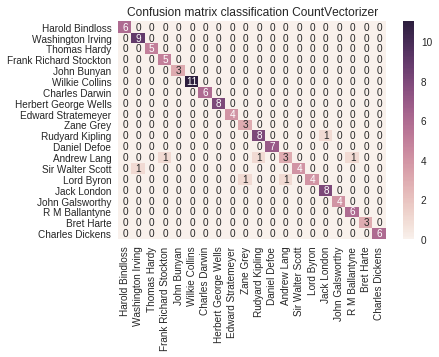

In [0]:
confusionMatrixClassification = confusion_matrix(y_prezis, y_test);
plt.title("Confusion matrix classification CountVectorizer");
sns.heatmap(confusionMatrixClassification, annot=True, xticklabels=list(authors_dict.values()), yticklabels=list(authors_dict.values()))

## TfidfVectorizer


In [0]:
svc = SVC()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size = 0.3)

classifier = GridSearchCV(svc, parameters, return_train_score=True, verbose=True)
classifier.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  9.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10], 'gamma': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [0]:
print (classifier.cv_results_)
print (classifier.best_score_)
print (classifier.best_params_)

{'mean_fit_time': array([13.23846777, 13.83802334, 12.83268563, 13.94211284, 11.84030342,
       13.14511847, 12.11152156, 14.13661639]), 'std_fit_time': array([0.62597831, 0.4149515 , 0.70315257, 0.72151124, 0.45569687,
       0.73625202, 0.49682877, 0.58593387]), 'mean_score_time': array([3.42568731, 3.48223265, 3.40034   , 3.52162321, 3.2700301 ,
       3.38307428, 3.32331975, 3.41175961]), 'std_score_time': array([0.10304053, 0.08499597, 0.06867087, 0.13109085, 0.09169497,
       0.10792613, 0.09498461, 0.12128985]), 'param_C': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1, 1, 10, 10, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
             

In [0]:
y_prezis = classifier.predict(X_test)
print (accuracy_score(y_prezis, y_test))

0.95


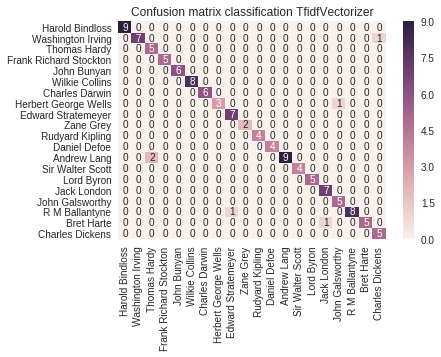

In [0]:
confusionMatrixClassification = confusion_matrix(y_prezis, y_test);
plt.title("Confusion matrix classification TfidfVectorizer");
sns.heatmap(confusionMatrixClassification, annot=True, xticklabels=list(authors_dict.values()), yticklabels=list(authors_dict.values()))

## PCA 

Putem reduce dimensiunea vectorilor folosind PCA, atat pentru setul de date cu CountVectorizer, cat si pentru cel cu TfidfVectorizer. Impartim din nou in multime de antrenare si multime de testare, reantrenam si cautam din nou cei mai buni parametri. 

### CountVectorizer

In [0]:
pca = PCA()
X_count_pca= pca.fit_transform(X_count)

In [0]:
svc = SVC()

X_train, X_test, y_train, y_test = train_test_split(X_count_pca, y_count, test_size = 0.3)

classifier = GridSearchCV(svc, parameters, return_train_score=True, verbose=True)
classifier.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10], 'gamma': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [0]:
print (classifier.cv_results_)
print (classifier.best_score_)
print (classifier.best_params_)

{'mean_fit_time': array([0.02982744, 0.05113467, 0.03005711, 0.05090078, 0.03002628,
       0.05094798, 0.02990158, 0.05123973]), 'std_fit_time': array([0.00044972, 0.00200345, 0.00020043, 0.00240465, 0.00054434,
       0.00295073, 0.00050638, 0.00211944]), 'mean_score_time': array([0.01062934, 0.01228452, 0.01060049, 0.01182032, 0.010475  ,
       0.01207892, 0.01092275, 0.01197823]), 'std_score_time': array([0.0004495 , 0.00024078, 0.00042571, 0.00030141, 0.00030134,
       0.00030762, 0.00012759, 0.00048146]), 'param_C': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1, 1, 10, 10, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                   'l

In [0]:
y_prezis = classifier.predict(X_test)
print (accuracy_score(y_prezis, y_test))

0.925


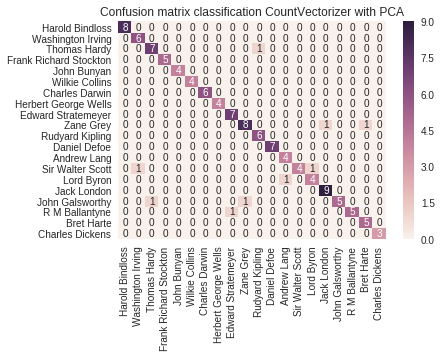

In [0]:
confusionMatrixClassification = confusion_matrix(y_prezis, y_test);
plt.title("Confusion matrix classification CountVectorizer with PCA");
sns.heatmap(confusionMatrixClassification, annot=True, xticklabels=list(authors_dict.values()), yticklabels=list(authors_dict.values()))

### TfidfVectorizer

In [0]:
pca = PCA()
X_tfidf_pca= pca.fit_transform(X_tfidf)

In [0]:
svc = SVC()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_pca, y_tfidf, test_size = 0.3)

classifier = GridSearchCV(svc, parameters, return_train_score=True, verbose=True)
classifier.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10], 'gamma': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [0]:
print (classifier.cv_results_)
print (classifier.best_score_)
print (classifier.best_params_)

{'mean_fit_time': array([0.04519526, 0.05433353, 0.04542581, 0.05306864, 0.04379026,
       0.05013378, 0.04179756, 0.05223314]), 'std_fit_time': array([0.00279939, 0.00512812, 0.00291416, 0.00185609, 0.00187369,
       0.00243475, 0.00175709, 0.00213336]), 'mean_score_time': array([0.01152436, 0.01460497, 0.01133243, 0.01229938, 0.01103417,
       0.01166709, 0.01114074, 0.01208671]), 'std_score_time': array([0.0001396 , 0.00116281, 0.00030984, 0.00049757, 0.00012931,
       0.00022759, 0.00019208, 0.00034148]), 'param_C': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1, 1, 10, 10, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                   'l

In [0]:
y_prezis = classifier.predict(X_test)
print (accuracy_score(y_prezis, y_test))

0.9833333333333333


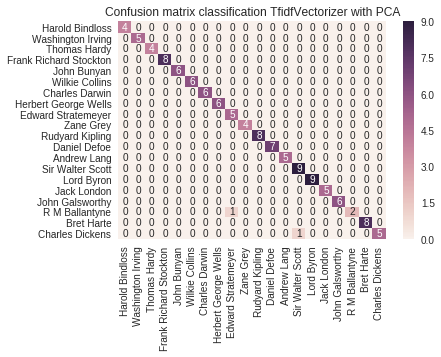

In [0]:
confusionMatrixClassification = confusion_matrix(y_prezis, y_test);
plt.title("Confusion matrix classification TfidfVectorizer with PCA");
sns.heatmap(confusionMatrixClassification, annot=True, xticklabels=list(authors_dict.values()), yticklabels=list(authors_dict.values()))

Antrenarea dupa ce am folosit PCA a durat semnificativ mai putin timp, dar rezultatele obtinute din punctul de vedere al acuratetii sunt similare ca atunci cand nu erau reduse dimensiunile vectorilor. 

In concluzie, in urma celor 4 seturi de date folosite am ajuns la urmatoarele rezultate:
* Set de date cu CountVectorizer
      1) Cei mai buni parametri GridSearch: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
      2) Cel mai bun scor GridSearch: 0.921
      3) Acuratete set de test: 0.941
      4) Numar de exemple gresit clasificate: 7
* Set de date cu TfidfVectorizer
      1) Cei mai buni parametri GridSearch: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
      2) Cel mai bun scor GridSearch: 0.928
      3) Acuratete set de test: 0.95
      4) Numar de exemple gresit clasificate: 6
* Set de date cu CountVectorizer si PCA
      1) Cei mai buni parametri GridSearch: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
      2) Cel mai bun scor GridSearch: 0.925
      3) Acuratete set de test: 0.925
      4) Numar de exemple gresit clasificate: 9
* Set de date cu TfidfVectorizer si PCA
      1) Cei mai buni parametri GridSearch: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
      2) Cel mai bun scor GridSearch: 0.946
      3) Acuratete set de test: 0.983
      4) Numar de exemple gresit clasificate: 2

# Task 2: Text Clustering



Pentru acest prim task vom incerca sa gasim cea mai buna impartite in clustere pentru cele 20 de clase pe care le avem folosind KMeans, AgglomerativeClustering si DBSCAN. 

Vom analiza din noua cele patru seturi de date pe care le avem (datasetul cu CountVectorizer, cu TfidfVectorizer, dar si fiecare dintre ele dupa PCA). 

Ulterior, pentru a vizualiza clusterele - vom reduce dimensiunea la 2D si vom plota puncte corespunzatoare fiecarui text al fiecarui autor in parte. 

## CountVectorizer

In [23]:
len(X_count)

100

In [0]:
# algorithms = [KMeans, AgglomerativeClustering]
algorithms = [DBSCAN]

for i, Algorithm in enumerate(algorithms):
    print(Algorithm)
    cl = Algorithm()
    #cl.set_params(n_clusters=20)
    
    y_pred = cl.fit_predict(X_count);
    
    #ss = silhouette_score(X_count, y_pred)
    #print("Silhuette score:", ss)

    ar = adjusted_rand_score(y_count, y_pred)
    print("Adjusted rand score:", ar)
    
    hs = homogeneity_score(y_count, y_pred)
    print("Homogenity score:", hs)
    
    cs = completeness_score(y_count, y_pred)
    print("Completeness score:", cs)

## TfidfVectorizer

In [58]:
#algorithms = [KMeans, AgglomerativeClustering]
algorithms = [DBSCAN]
metrics = ['cityblock', 'cosine', 'l1', 'l2', 'manhattan']

for i, Algorithm in enumerate(algorithms):
    print(Algorithm)
    cl = Algorithm()
    #cl.set_params(n_clusters=20)
    cl.set_params(metric='cosine')
    
    y_pred = cl.fit_predict(X_tfidf);
    
    #ss = silhouette_score(X_tfidf, y_pred)
    #print("Silhuette score:", ss)

    ar = adjusted_rand_score(y_tfidf, y_pred)
    print("Adjusted rand score:", ar)
    
    hs = homogeneity_score(y_tfidf, y_pred)
    print("Homogenity score:", hs)
    
    cs = completeness_score(y_tfidf, y_pred)
    print("Completeness score:", cs)

<class 'sklearn.cluster.dbscan_.DBSCAN'>
Adjusted rand score: 0.0
Homogenity score: -1.8530077511032753e-16
Completeness score: 1.0


## PCA

### CountVectorizer

In [59]:
algorithms = [KMeans, AgglomerativeClustering]
# algorithms = [DBSCAN]

for i, Algorithm in enumerate(algorithms):
    print(Algorithm)
    cl = Algorithm()
    cl.set_params(n_clusters=20)
    
    y_pred = cl.fit_predict(X_count_pca);
    
    ss = silhouette_score(X_count_pca, y_pred)
    print("Silhuette score:", ss)

    ar = adjusted_rand_score(y_count, y_pred)
    print("Adjusted rand score:", ar)
    
    hs = homogeneity_score(y_count, y_pred)
    print("Homogenity score:", hs)
    
    cs = completeness_score(y_count, y_pred)
    print("Completeness score:", cs)

<class 'sklearn.cluster.k_means_.KMeans'>
Silhuette score: 0.1574988085622107
Adjusted rand score: 0.44666353383458646
Homogenity score: 0.6733057055832191
Completeness score: 0.7140283971595858
<class 'sklearn.cluster.hierarchical.AgglomerativeClustering'>
Silhuette score: 0.14567296970932472
Adjusted rand score: 0.5919817078616895
Homogenity score: 0.7728125617208996
Completeness score: 0.8020811177190355


### TfidfVectorizer

In [60]:
algorithms = [KMeans, AgglomerativeClustering]
# algorithms = [DBSCAN]

for i, Algorithm in enumerate(algorithms):
    print(Algorithm)
    cl = Algorithm()
    cl.set_params(n_clusters=20)
    
    y_pred = cl.fit_predict(X_tfidf_pca);
    
    ss = silhouette_score(X_tfidf_pca, y_pred)
    print("Silhuette score:", ss)

    ar = adjusted_rand_score(y_tfidf, y_pred)
    print("Adjusted rand score:", ar)
    
    hs = homogeneity_score(y_tfidf, y_pred)
    print("Homogenity score:", hs)
    
    cs = completeness_score(y_tfidf, y_pred)
    print("Completeness score:", cs)

<class 'sklearn.cluster.k_means_.KMeans'>
Silhuette score: 0.0370075594560829
Adjusted rand score: 0.4084214296823819
Homogenity score: 0.6285332030833216
Completeness score: 0.7318980588798295
<class 'sklearn.cluster.hierarchical.AgglomerativeClustering'>
Silhuette score: 0.040469448886132436
Adjusted rand score: 0.4146566398561131
Homogenity score: 0.6652501283678071
Completeness score: 0.7792252723639098


In urma variantelor incercate cu cei 3 algoritmi am obtinut urmatoarele rezultate:

* Set de date cu CountVectorizer:
      1) KMeans: 
        * Silhuette score: 0.15581554046370472
        * Adjusted rand score: 0.5004620936078031
        * Homogenity score: 0.7021141579865764
        * Completness score: 0.7300836432821347
      2) AglomerativeClustering: 
        * Silhuette score: 0.14567296970932384
        * Adjusted rand score: 0.5919817078616895
        * Homogenity score: 0.7728125617208996
        * Completness score: 0.8020811177190355
      3) DBSCAN: 
        * Adjusted rand score: 0.0
        * Homogenity score: -1.8530077511032753e-16
        * Completness score: 1.0
* Set de date cu TfidfVectorizer:
      1) KMeans: 
        * Silhuette score: 0.03769535878473589
        * Adjusted rand score: 0.32824866135562225
        * Homogenity socre: 0.564404916762279
        * Completness score: 0.6856411274525063 
      2) AglomerativeClustering: 
        * Silhuette score: 0.04046944888613252
        * Adjusted rand score: 0.4146566398561131
        * Homogenity score: 0.6652501283678071
        * Completness score: 0.7792252723639098
      3) DBSCAN: 
        * Adjusted rand score:  0.0024715782671175285
        * Homogenity score: 0.03036233220116259
        * Completness score: 0.3781870119994985
 
 In rezultate de mai sus am folosit distanta setata implicita ('euclidean') si n_clusters=20 pentru KMeans si AglomerativeClustering. Dupa care, pentru DBSCAN folosind setul de date cu TfidfVectorizer am incercat si alte variante de distante si am obtinut urmatoarele rezultate: 
        1) 'cityblock': 
        Adjusted rand score: 0.0
        Homogenity score: -1.8530077511032753e-16
        Completeness score: 1.0
        2) 'manhattan':
        Adjusted rand score: 0.0
        Homogenity score: -1.8530077511032753e-16
        Completeness score: 1.0
        3) 'cosine' 
        Adjusted rand score: 0.0
        Homogenity score: -1.8530077511032753e-16
        Completeness score: 1.0
 
 
 


In concluzie, vectorii de dimensiuni mari nu produc cele mai bune clustere folosind cei trei algoritmi. Cel mai slab scor este obtinut folosind DBSCAN, intrucat atunci cand datele sunt vectorizate cu CountVectorizer obtine un scor de completness perfect, doar ca uitandu-ne la valorile prezise observam ca tot ce face este sa clasfice toate datele intr-o singura categorie - astfel, restul scorurilor fiind foarte aproape de zero. (clustere suprapuse perfect)

Ulterior, am reantrenat si dupa ce am folosit PCA pentru a reduce dimensiunile setului de date, dar rezultatele nu s-au imbunatatit semnificativ. In continuare KMeans si AgglomerativeClustering reusesc sa obtine cele mai bune rezultate, dar totusi 'silhoutte score' pentru amandoua este in jurul valorii de 0.1 - 0.2 ceea ce indica o suprapunere destul de mare a clusterelor. Cu toate acestea, consider ca cel mai bun rezultat a fost obtinut pe setul de date cu CountVectorizer, folosind AgglomerativeClustering: 

* Silhuette score: 0.14567296970932472
* Adjusted rand score: 0.5919817078616895
* Homogenity score: 0.7728125617208996
* Completeness score: 0.8020811177190355

In aceasta varianta, clusterele se disting cel mai mult, iar elemente ale aceeasi clase ajung sa fie pozitionate in acelasi cluster. 

### Visualize PCA clusters

Am redus dimensiunea vectorilor la 2 pentru a ii putea plota si a observa suprapunerile ce apar intre autori. 

In [0]:
colors = ['firebrick', 'darksalmon', 'gold', 'deepskyblue', 'navy', 'plum',
          'palevioletred', 'chocolate', 'teal', 'cyan', 'grey', 'lightpink',
          'hotpink', 'y', 'olive', 'cornflowerblue', 'indigo', 'r', 'peru',
          'springgreen']

CountVectorizer

In [0]:
pca = PCA(n_components=2)
X = pca.fit_transform(X_count)

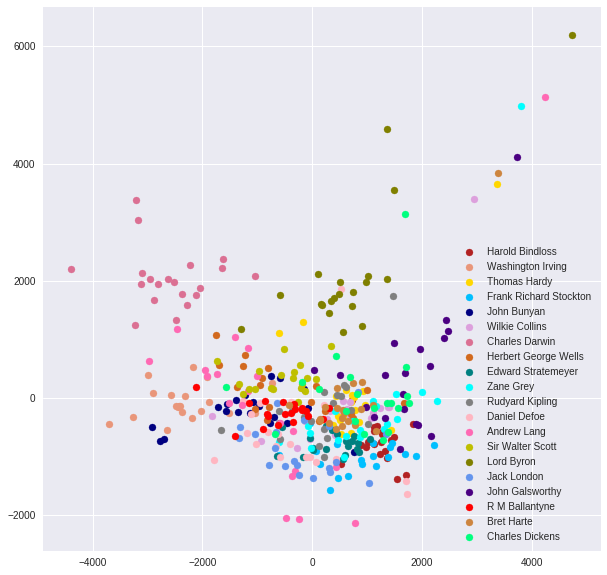

In [0]:
plt.figure(figsize=(10,10))
for i in range(0 , len(colors)):
    indices = [j for j in range(len(y_tfidf)) if y_count[j] == i]
    plt.scatter(X[indices, 0], X[indices, 1], color=colors[i], label=authors_dict[i])
plt.legend()
plt.show()

Se disting dintre autori urmatorii: 
* Charles Darwin 
* Lord Byron 
* Washington Irving 
* John Galsworthy 
* Frank Richard Stockton 

Exista cele mai mari suprapuneri intre urmatorii autori: 
* R M Ballantyne si John Bunyan 
* Charles Dickens, Herbert George Wells, Rudyard Kipling 
* Wilkie Collins si Jack London 

TfidfVectorizer

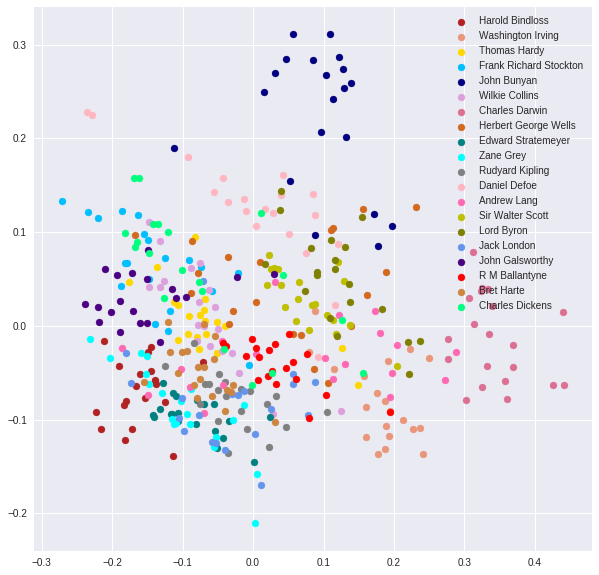

In [0]:
pca = PCA(n_components=2)
X = pca.fit_transform(X_tfidf)

plt.figure(figsize=(10,10))
for i in range(0 , len(colors)):
    indices = [j for j in range(len(y_tfidf)) if y_tfidf[j] == i]
    plt.scatter(X[indices, 0], X[indices, 1], color=colors[i], label=authors_dict[i])
plt.legend()
plt.show()

Se disting dintre autori urmatorii: 
* John Bunyan
* Charles Darwin
* Washington Irving 
* Daniel Defoe 
* Sir Walter Scott 
* John Galsworthy 
* R M Ballantyne 

Exista cele mai mari suprapuneri intre urmatorii autori: 
* Zane Grey, Jack London si Edward Stratemeyer 
* Wilkie Collins si Thomas Hardy 